## What is the main purpose of the project? <a class="anchor" id="goal"></a>

### Data Preprocessing <a class="anchor" id="goal"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option('display.float_format', '{:.2f}'.format)

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

### Loading and checking  dataset <a class="anchor" id="dataset"></a>

In [2]:
df=pd.read_csv("raw_house_data.csv")

In [3]:
df.info()   
#We have chance to see the types of the features and number of not-Null values with this code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory 

In [4]:
df.shape

(5000, 16)

In [5]:
df2=df['kitchen_features'].str.split(',', expand=True).rename(columns = lambda x: "kitchen_f"+str(x+1));
df3=df['floor_covering'].str.split(',', expand=True).rename(columns = lambda x: "floor_c"+str(x+1))

In [6]:
df=df.drop(['floor_covering'], axis=1)

In [7]:
df["House_Age"]=2023-df.year_built;
df=df.drop(['year_built'], axis=1)

In [8]:
df.head(1)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,HOA,House_Age
0,21530491,5300000.00,85637,-110.38,31.36,2154.00,5272.00,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,0,82


In [9]:
df=df.drop(['kitchen_features'], axis=1)

In [10]:
df.head(1)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,House_Age
0,21530491,5300000.00,85637,-110.38,31.36,2154.00,5272.00,13,10,10500,0,6,0,82


In [11]:
df2.sample(10)
#to see data from different rows

,kitchen_f1,kitchen_f2,kitchen_f3,kitchen_f4,kitchen_f5,kitchen_f6,kitchen_f7,kitchen_f8,kitchen_f9,kitchen_f10,kitchen_f11,kitchen_f12,kitchen_f13,kitchen_f14,kitchen_f15
1430,Dishwasher,Garbage Disposal,Refrigerator,Microwave,Oven,None,None,None,None,None,None,None,None,None,None
2954,Dishwasher,Double Sink,Garbage Disposal,Gas Range,Island,Pantry: Closet,Appliance Color: Stainless,Countertops: Granite,Microwave: Stainless steel,Oven: Wall,None,None,None,None,None
1861,Desk,Dishwasher,Double Sink,Garbage Disposal,Gas Range,Island,Pantry: Walk-In,Refrigerator,Warming Drawer,Appliance Color: Stainless,Countertops: Granite,Microwave: Stainless,Oven: Stainless,None,None
2616,Dishwasher,Garbage Disposal,Refrigerator,Microwave,Oven,None,None,None,None,None,None,None,None,None,None
1730,Dishwasher,Electric Range,Garbage Disposal,Pantry: Butler,Refrigerator,Appliance Color: Other,Countertops: tile,None,None,None,None,None,None,None,None
1351,Dishwasher,Freezer,Garbage Disposal,Refrigerator,Microwave,Oven,None,None,None,None,None,None,None,None,None
1984,Dishwasher,Garbage Disposal,Refrigerator,Microwave,Oven,None,None,None,None,None,None,None,None,None,None
3629,Dishwasher,Freezer,Garbage Disposal,Refrigerator,Microwave,Oven,None,None,None,None,None,None,None,None,None
4852,Dishwasher,Garbage Disposal,Refrigerator,Microwave,Oven,None,None,None,None,None,None,None,None,None,None
1647,Dishwasher,Double Sink,Gas Range,Island,Pantry: Walk-In,Refrigerator,Water Purifier,Appliance Color: Black,Countertops: Granite,None,None,None,None,None,None


In [12]:
df.info()   
#We have chance to see the types of the features and number of not-Null values with this code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MLS         5000 non-null   int64  
 1   sold_price  5000 non-null   float64
 2   zipcode     5000 non-null   int64  
 3   longitude   5000 non-null   float64
 4   latitude    5000 non-null   float64
 5   lot_acres   4990 non-null   float64
 6   taxes       5000 non-null   float64
 7   bedrooms    5000 non-null   int64  
 8   bathrooms   5000 non-null   object 
 9   sqrt_ft     5000 non-null   object 
 10  garage      5000 non-null   object 
 11  fireplaces  5000 non-null   object 
 12  HOA         5000 non-null   object 
 13  House_Age   5000 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 547.0+ KB


In [13]:
df['bathrooms'] = pd.to_numeric(df['bathrooms'],errors = 'coerce');
df['sqrt_ft'] = pd.to_numeric(df['sqrt_ft'],errors = 'coerce');
df['garage'] = pd.to_numeric(df['garage'],errors = 'coerce');
df['fireplaces'] = pd.to_numeric(df['fireplaces'],errors = 'coerce')
df['HOA'] = pd.to_numeric(df['HOA'],errors = 'coerce')
#correlation can not be calculated for object data types,therefore,converted to numeric.

In [14]:
df2.fillna(0)
#to fill the null values with zero

,kitchen_f1,kitchen_f2,kitchen_f3,kitchen_f4,kitchen_f5,kitchen_f6,kitchen_f7,kitchen_f8,kitchen_f9,kitchen_f10,kitchen_f11,kitchen_f12,kitchen_f13,kitchen_f14,kitchen_f15
0,Dishwasher,Freezer,Refrigerator,Oven,0,0,0,0,0,0,0,0,0,0,0
1,Dishwasher,Garbage Disposal,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Dishwasher,Garbage Disposal,Refrigerator,0,0,0,0,0,0,0,0,0,0,0,0
3,Dishwasher,Double Sink,Pantry: Butler,Refrigerator,0,0,0,0,0,0,0,0,0,0,0
4,Dishwasher,Garbage Disposal,Refrigerator,Microwave,Oven,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Dishwasher,Double Sink,Garbage Disposal,Gas Range,Island,Lazy Susan,Pantry: Closet,Appliance Color: Stainless,Countertops: Granite,0,0,0,0,0,0
4996,Dishwasher,Double Sink,Electric Range,Garbage Disposal,Lazy Susan,Pantry: Closet,Refrigerator,Wet Bar,Appliance Color: Stainless,Microwave: Built-in,0,0,0,0,0
4997,Dishwasher,Electric Range,Island,Refrigerator,Reverse Osmosis,Appliance Color: Stainless,0,0,0,0,0,0,0,0,0
4998,Dishwasher,Double Sink,Garbage Disposal,Gas Range,Pantry: Cabinet,Appliance Color: Stainless,Countertops: Granite slab,Microwave: Stainless over oven,Oven: wall,0,0,0,0,0,0


In [15]:
df2=df2.replace(regex={r'\D+': 1});    #instead of string values, to write 1
df2=df2.fillna(0)   #to fill the null values with zero

In [16]:
df2.head()
#gives us first 5 rows

,kitchen_f1,kitchen_f2,kitchen_f3,kitchen_f4,kitchen_f5,kitchen_f6,kitchen_f7,kitchen_f8,kitchen_f9,kitchen_f10,kitchen_f11,kitchen_f12,kitchen_f13,kitchen_f14,kitchen_f15
0,1,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [17]:
df2['Kitchen_Sum']=df2.sum(axis=1);
#cretaed a new column named Kitchen_Sum and sum of the values from that row were written to that column

In [18]:
df2.head()
#gives us first 5 rows

,kitchen_f1,kitchen_f2,kitchen_f3,kitchen_f4,kitchen_f5,kitchen_f6,kitchen_f7,kitchen_f8,kitchen_f9,kitchen_f10,kitchen_f11,kitchen_f12,kitchen_f13,kitchen_f14,kitchen_f15,Kitchen_Sum
0,1,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00
1,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
2,1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
3,1,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00
4,1,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00


In [19]:
df2=df2['Kitchen_Sum']   #defined df2 just with Kitchen_Sum column

In [20]:
df2

0       4.00
1       2.00
2       3.00
3       4.00
4       5.00
        ... 
4995    9.00
4996   10.00
4997    6.00
4998    9.00
4999    5.00
Name: Kitchen_Sum, Length: 5000, dtype: float64

In [21]:
df3=df3.fillna(0)    #null values replaced with zeros

In [22]:
df3=df3.replace(regex={r'\D+': 1});  ##instead of string values, to write 1
df3=df3.fillna(0)  #null values replaced with zeros

In [23]:
df3['Floor_Sum']=df3.sum(axis=1)    
#cretaed a new column named Floor_Sum and sum of the values from that row were written to that column

In [24]:
df3=df3['Floor_Sum']   #defined df3 just with Floor_Sum column

In [25]:
df3

0       2
1       2
2       2
3       3
4       2
       ..
4995    2
4996    2
4997    1
4998    2
4999    2
Name: Floor_Sum, Length: 5000, dtype: int64

In [26]:
df_new= pd.concat([df2,df3], axis=1)  #df2 and df2 were concatenated

In [27]:
df_new.sample(10)   #from different 10 rows to see the data frame

,Kitchen_Sum,Floor_Sum
1976,4.00,2
2664,4.00,2
2414,5.00,3
4788,5.00,3
3518,14.00,4
3979,1.00,2
4934,4.00,1
1369,7.00,2
3148,5.00,2
2034,12.00,3


In [28]:
df_neww= pd.concat([df,df_new], axis=1)  #df and df_new were concatenated

In [29]:
df_neww.head(5);   #to see the first 5 rows
df=df_neww

In [30]:
df.head(5)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,House_Age,Kitchen_Sum,Floor_Sum
0,21530491,5300000.00,85637,-110.38,31.36,2154.00,5272.00,13,10.00,10500.00,0.00,6.00,0.00,82,4.00,2
1,21529082,4200000.00,85646,-111.05,31.59,1707.00,10422.36,2,2.00,7300.00,0.00,5.00,0.00,26,2.00,2
2,3054672,4200000.00,85646,-111.04,31.59,1707.00,10482.00,2,3.00,NaN,NaN,5.00,NaN,26,3.00,2
3,21919321,4500000.00,85646,-111.04,31.65,636.67,8418.58,7,5.00,9019.00,4.00,4.00,NaN,93,4.00,3
4,21306357,3411450.00,85750,-110.81,32.29,3.21,15393.00,4,6.00,6396.00,3.00,5.00,55.00,28,5.00,2


In [31]:
df['MLS'].nunique()   #to check how many unique values in MLS column

5000

In [32]:
df.set_index('MLS',inplace=True)

#setting the MLS column as an index column.Because for each house there is a different number.

In [33]:
df.info()   
#to see the types of the features and number of not-Null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 21530491 to 4111490
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sold_price   5000 non-null   float64
 1   zipcode      5000 non-null   int64  
 2   longitude    5000 non-null   float64
 3   latitude     5000 non-null   float64
 4   lot_acres    4990 non-null   float64
 5   taxes        5000 non-null   float64
 6   bedrooms     5000 non-null   int64  
 7   bathrooms    4994 non-null   float64
 8   sqrt_ft      4944 non-null   float64
 9   garage       4993 non-null   float64
 10  fireplaces   4975 non-null   float64
 11  HOA          4420 non-null   float64
 12  House_Age    5000 non-null   int64  
 13  Kitchen_Sum  5000 non-null   float64
 14  Floor_Sum    5000 non-null   int64  
dtypes: float64(11), int64(4)
memory usage: 625.0 KB


In [34]:
df.isnull().sum()
#number of Null values for each feature

sold_price       0
zipcode          0
longitude        0
latitude         0
lot_acres       10
taxes            0
bedrooms         0
bathrooms        6
sqrt_ft         56
garage           7
fireplaces      25
HOA            580
House_Age        0
Kitchen_Sum      0
Floor_Sum        0
dtype: int64

In [35]:
df = df.fillna(np.nan)   #to replace with NaN

In [36]:
df.garage   #to see only garage column

MLS
21530491   0.00
21529082   0.00
3054672     NaN
21919321   4.00
21306357   3.00
           ... 
21810382   3.00
21908591   3.00
21832452   0.00
21900515   3.00
4111490     NaN
Name: garage, Length: 5000, dtype: float64

In [37]:
df.isnull().sum()
#sum of NaN values

sold_price       0
zipcode          0
longitude        0
latitude         0
lot_acres       10
taxes            0
bedrooms         0
bathrooms        6
sqrt_ft         56
garage           7
fireplaces      25
HOA            580
House_Age        0
Kitchen_Sum      0
Floor_Sum        0
dtype: int64

In [38]:
df.info()   #to see the number of non-null values and data types.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 21530491 to 4111490
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sold_price   5000 non-null   float64
 1   zipcode      5000 non-null   int64  
 2   longitude    5000 non-null   float64
 3   latitude     5000 non-null   float64
 4   lot_acres    4990 non-null   float64
 5   taxes        5000 non-null   float64
 6   bedrooms     5000 non-null   int64  
 7   bathrooms    4994 non-null   float64
 8   sqrt_ft      4944 non-null   float64
 9   garage       4993 non-null   float64
 10  fireplaces   4975 non-null   float64
 11  HOA          4420 non-null   float64
 12  House_Age    5000 non-null   int64  
 13  Kitchen_Sum  5000 non-null   float64
 14  Floor_Sum    5000 non-null   int64  
dtypes: float64(11), int64(4)
memory usage: 625.0 KB


In [39]:
df.columns    #to see the column names

Index(['sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'fireplaces', 'HOA', 'House_Age', 'Kitchen_Sum', 'Floor_Sum'], dtype='object')

In [40]:
df.head(2)  #first 2 rows

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,House_Age,Kitchen_Sum,Floor_Sum
MLS,,,,,,,,,,,,,,,
21530491,5300000.00,85637,-110.38,31.36,2154.00,5272.00,13,10.00,10500.00,0.00,6.00,0.00,82,4.00,2
21529082,4200000.00,85646,-111.05,31.59,1707.00,10422.36,2,2.00,7300.00,0.00,5.00,0.00,26,2.00,2


In [41]:
df['bathrooms'].replace('None', np.nan, inplace=True);
df['garage'].replace('None', np.nan, inplace=True);
df['sqrt_ft'].replace('None', np.nan, inplace=True);
df['lot_acres'].replace('None', np.nan, inplace=True)
#replacing with NaN values

In [42]:
df.dropna(subset= ["lot_acres","garage","bathrooms","sqrt_ft","fireplaces"],inplace=True,axis=0);
#to drop rows that are with None values from specific columns

In [43]:
df.sqrt_ft.value_counts()   #to see the number of each value from  sqrt_ft column

3541.00    50
3052.00    25
3420.00    18
3002.00    16
3811.00    16
           ..
5586.00     1
5117.00     1
3793.00     1
5285.00     1
1772.00     1
Name: sqrt_ft, Length: 2360, dtype: int64

In [44]:
df['garage'].replace("2.5", 2, inplace=True);
df['garage'].replace("3.5", 3, inplace=True);
df['garage'].replace("4.5", 4, inplace=True)
#to replace with a different vlaue instead of some specific values

In [45]:
df = df[df.House_Age != 0]   #taking the houses without the age value zero and creating a new data frame

In [46]:
df.House_Age.value_counts()  #to see the number of each value from  House_Age column

17     243
21     234
18     230
16     224
19     200
      ... 
110      1
100      1
116      1
112      1
96       1
Name: House_Age, Length: 112, dtype: int64

In [47]:
df.columns  #to see the columns

Index(['sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'fireplaces', 'HOA', 'House_Age', 'Kitchen_Sum', 'Floor_Sum'], dtype='object')

In [48]:
df.House_Age.value_counts().sort_index(ascending=True).head(25)  
#counting the number of houses that have the same age, ordering them and taking first 25 houses

4      33
5      80
6      81
7      65
8      56
9      82
10     71
11     45
12     33
13     35
14     68
15    139
16    224
17    243
18    230
19    200
20    179
21    234
22    179
23    150
24    167
25    141
26    108
27    118
28    106
Name: House_Age, dtype: int64

In [49]:
df['bathrooms'].replace("2.5", 2, inplace=True);
df['bathrooms'].replace("3.5", 3, inplace=True);
df['bathrooms'].replace("4.5", 4, inplace=True)
#to replace with a different vlaue instead of some specific values

In [50]:
df.bathrooms.value_counts().head(25)  
#counting the number of bathrooms that have the number, ordering them and taking first 25 houses

3.00     1968
4.00     1821
5.00      651
6.00      206
2.00      188
7.00       56
8.00       19
9.00        8
3.50        7
2.50        3
1.00        3
11.00       2
35.00       2
10.00       1
4.50        1
14.00       1
18.00       1
15.00       1
36.00       1
Name: bathrooms, dtype: int64

### Generating descriptive statistics and finding the correlation <a class="anchor" id="descor"></a>

In [51]:
df.describe().loc["mean":,]
#it gives us descriptive statistics values
#"count" value will be same for all of them.That's why I started from "mean" with "loc"

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,House_Age,Kitchen_Sum,Floor_Sum
mean,775748.54,85724.21,-110.91,32.32,4.24,9448.51,3.94,3.83,3715.98,2.82,1.88,82.78,30.72,6.49,2.17
std,316051.70,36.71,0.12,0.17,45.85,173984.78,1.16,1.32,1120.04,1.20,1.13,92.53,65.85,3.01,0.76
min,169000.00,85118.00,-112.52,31.36,0.00,0.00,1.00,1.00,1100.00,0.00,0.00,0.00,4.00,1.00,1.00
25%,585000.00,85718.00,-110.98,32.28,0.58,4819.76,3.00,3.00,3047.00,2.00,1.00,8.00,17.00,5.00,2.00
50%,679000.00,85737.00,-110.92,32.32,0.98,6250.80,4.00,4.00,3512.00,3.00,2.00,55.00,24.00,5.00,2.00
75%,840000.00,85750.00,-110.86,32.40,1.73,8106.15,4.00,4.00,4128.50,3.00,3.00,134.00,36.00,9.00,3.00
max,5300000.00,86323.00,-109.45,34.93,2154.00,12215075.00,36.00,36.00,22408.00,30.00,9.00,925.00,2023.00,15.00,6.00


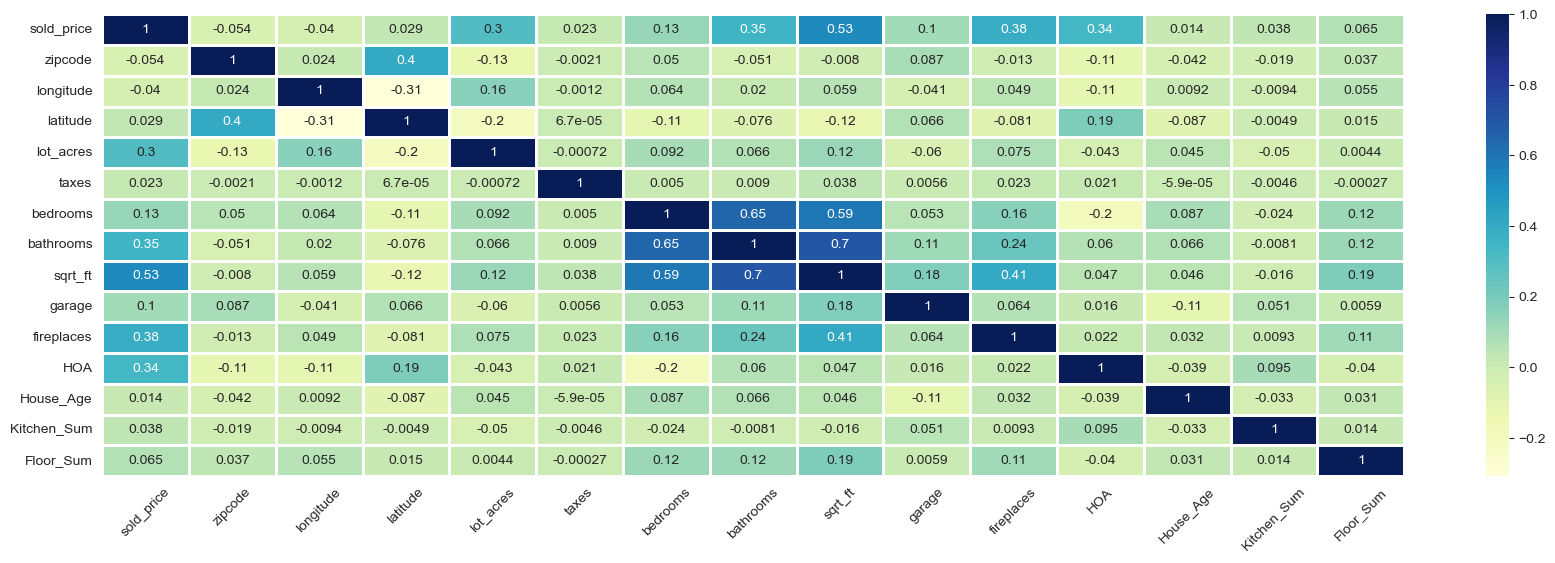

In [52]:
fig=plt.figure(figsize=(21,6))
sns.set_style('darkgrid',rc={'axes.facecolor': '#eaf'})
sns.set_palette('viridis',12)
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",linewidths=1)  
plt.xticks(rotation= 45) 
plt.show()
#correlation with heatmap

In [53]:
df.dtypes   #to see data types

sold_price     float64
zipcode          int64
longitude      float64
latitude       float64
lot_acres      float64
taxes          float64
bedrooms         int64
bathrooms      float64
sqrt_ft        float64
garage         float64
fireplaces     float64
HOA            float64
House_Age        int64
Kitchen_Sum    float64
Floor_Sum        int64
dtype: object

In [54]:
corr = df.corr().zipcode
corr[np.argsort(corr, axis= 0)[:-1]]    
#correlation between zipcode and other features, ordering them from min to max
#"argsort returns the indices that would sort an array
#so, we can easily see which features are more effective and which ones are not 

lot_acres     -0.13
HOA           -0.11
sold_price    -0.05
bathrooms     -0.05
House_Age     -0.04
Kitchen_Sum   -0.02
fireplaces    -0.01
sqrt_ft       -0.01
taxes         -0.00
longitude      0.02
Floor_Sum      0.04
bedrooms       0.05
garage         0.09
latitude       0.40
Name: zipcode, dtype: float64

In [55]:
corr = df.corr().lot_acres
corr[np.argsort(corr, axis= 0)[:-1]]    
#correlation between lot_acres and other features, ordering them from min to max

latitude      -0.20
zipcode       -0.13
garage        -0.06
Kitchen_Sum   -0.05
HOA           -0.04
taxes         -0.00
Floor_Sum      0.00
House_Age      0.04
bathrooms      0.07
fireplaces     0.07
bedrooms       0.09
sqrt_ft        0.12
longitude      0.16
sold_price     0.30
Name: lot_acres, dtype: float64

In [56]:
corr = df.corr().sold_price
corr[np.argsort(corr, axis= 0)[:-1]]    
#correlation between sold_price and other features, ordering them from min to max

zipcode       -0.05
longitude     -0.04
House_Age      0.01
taxes          0.02
latitude       0.03
Kitchen_Sum    0.04
Floor_Sum      0.06
garage         0.10
bedrooms       0.13
lot_acres      0.30
HOA            0.34
bathrooms      0.35
fireplaces     0.38
sqrt_ft        0.53
Name: sold_price, dtype: float64

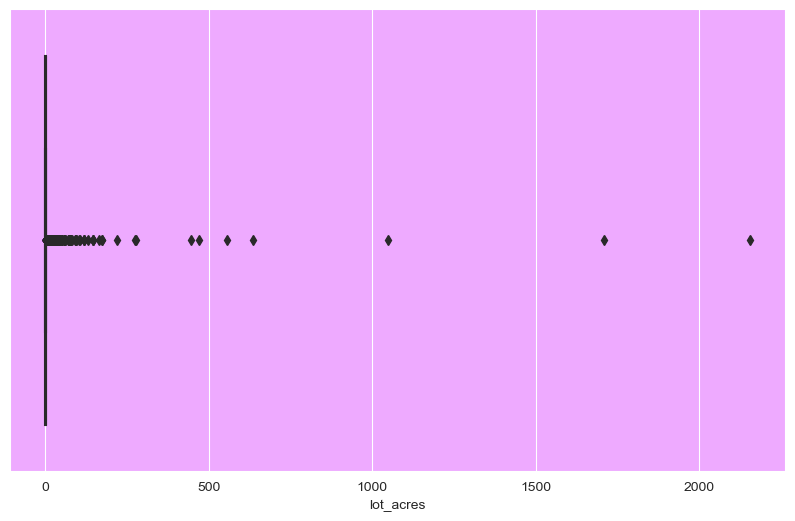

In [57]:
sns.boxplot(x=df["lot_acres"])
plt.show()
#to see the outliers with boxplot for lot_acres feature

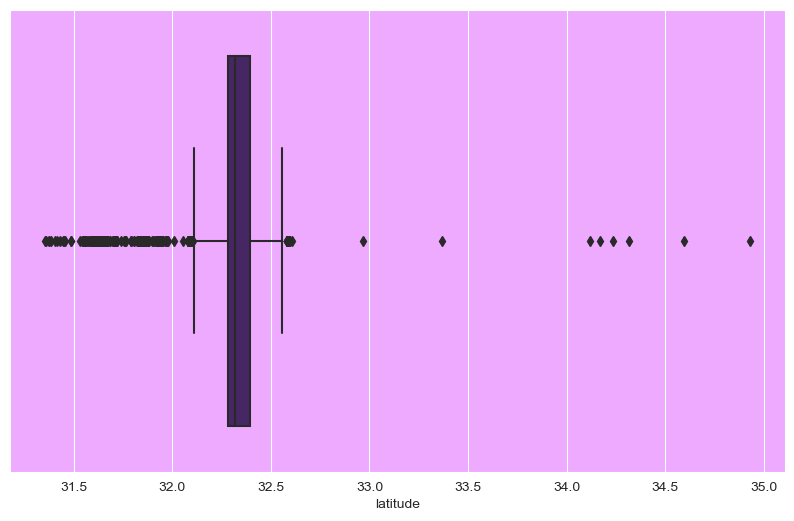

In [58]:
sns.boxplot(x=df["latitude"])
plt.show()
#to see the outliers with boxplot for latitude feature

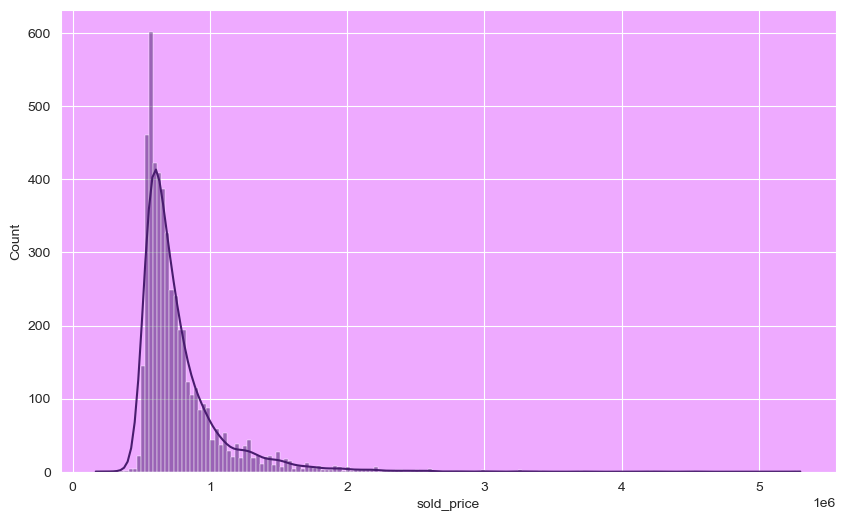

In [59]:
sns.histplot(df.sold_price,kde=True)
plt.show()
#to see the outliers with boxplot for sold_price feature
#If you set kde = True , the histplot() function will add the KDE line

#kernel density estimation (KDE) is the application of kernel smoothing for probability density estimation, i.e., 
#a non-parametric method to estimate the probability density function of a random variable based on kernels as weights.

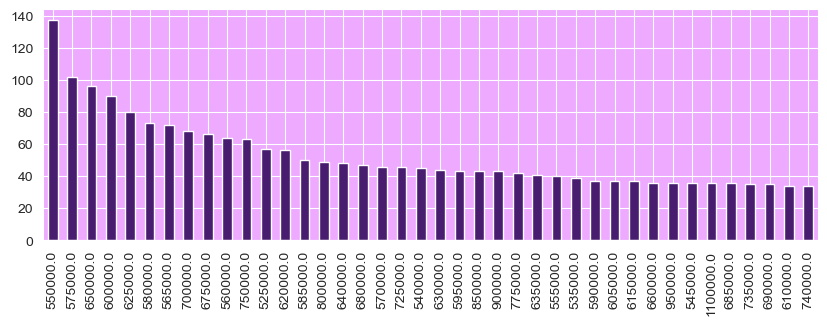

In [60]:
df.sold_price.value_counts().nlargest(40).plot(kind="bar",figsize=(10,3))
plt.show()
#counting sold prices and showing first largest 40 values

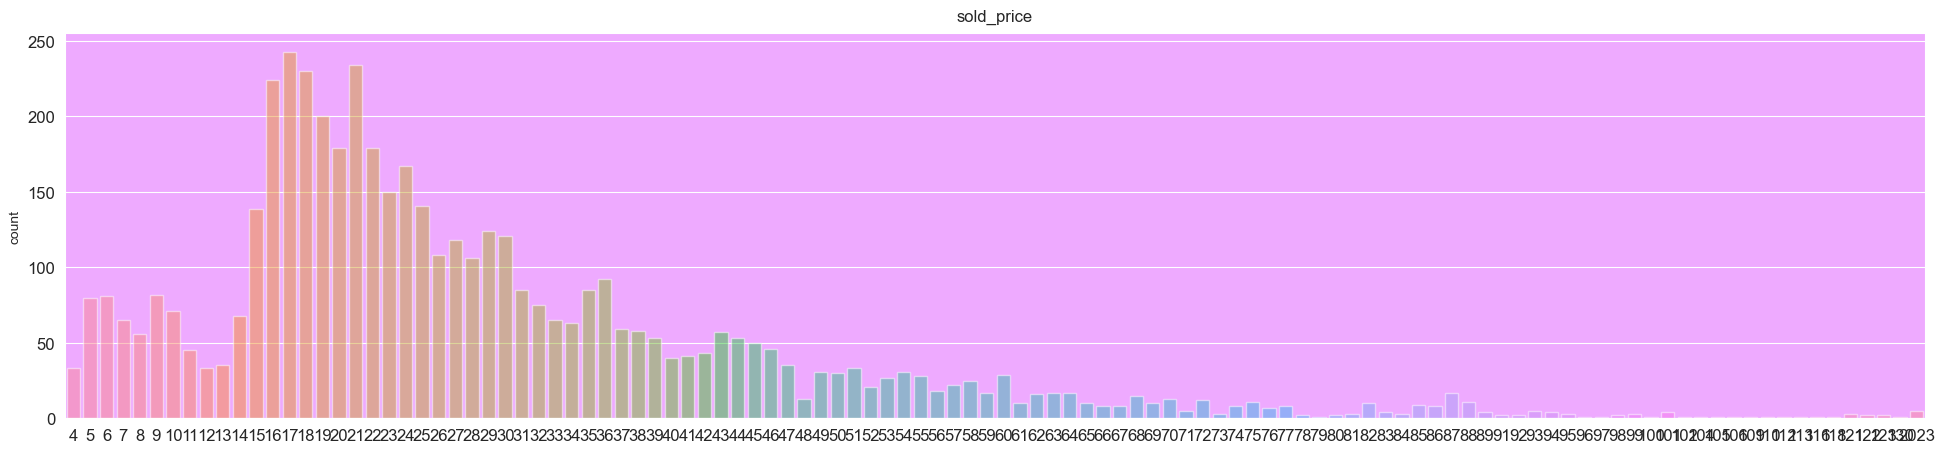

In [61]:
plt.figure(figsize= (24,5))
sns.countplot(x= df["House_Age"], alpha = 0.50, saturation= 1)  
plt.title("sold_price", size= 12, y= 1.01)   
plt.xlabel("")
plt.tick_params(axis = "both", labelsize= 12)
plt.show()
#distribution of house ages depending on sold prices

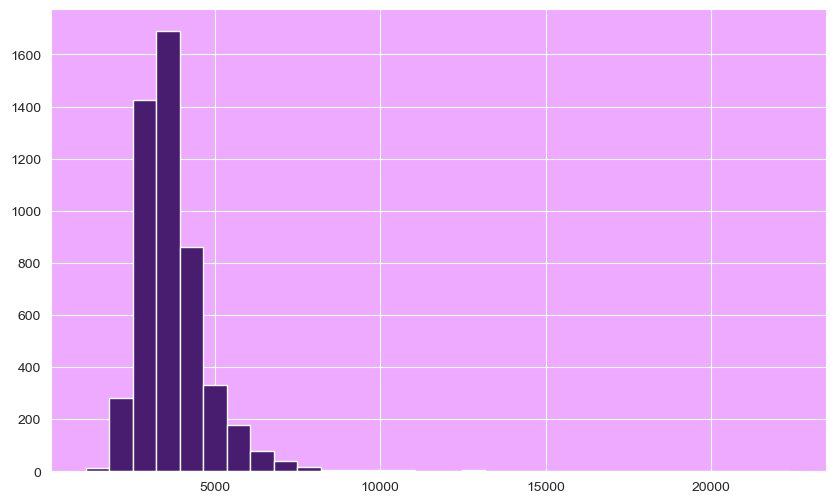

In [62]:
plt.hist(df["sqrt_ft"],bins=30)
plt.show()
#histogram graph for sqrt_ft

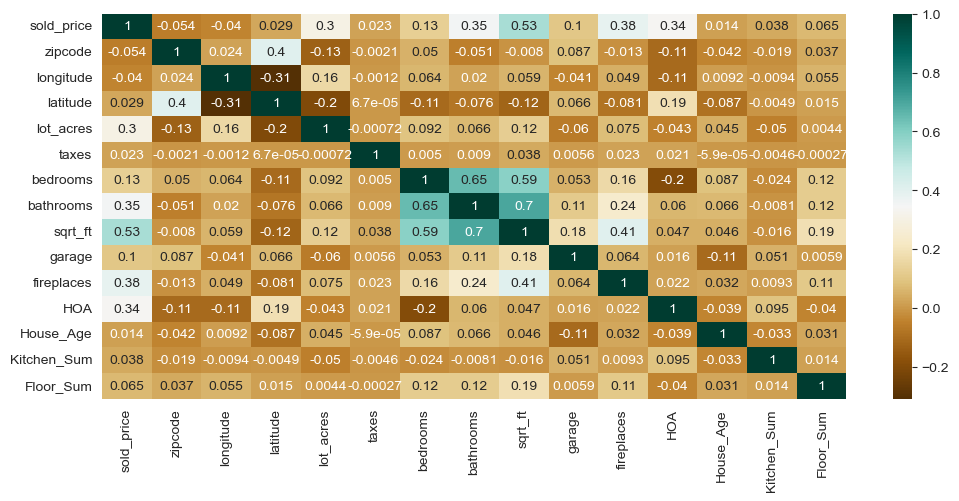

In [63]:
plt.figure(figsize=(12,5));
c=df.corr();
sns.heatmap(c,cmap="BrBG",annot=True)  
plt.show()
#heatmap for correlation values

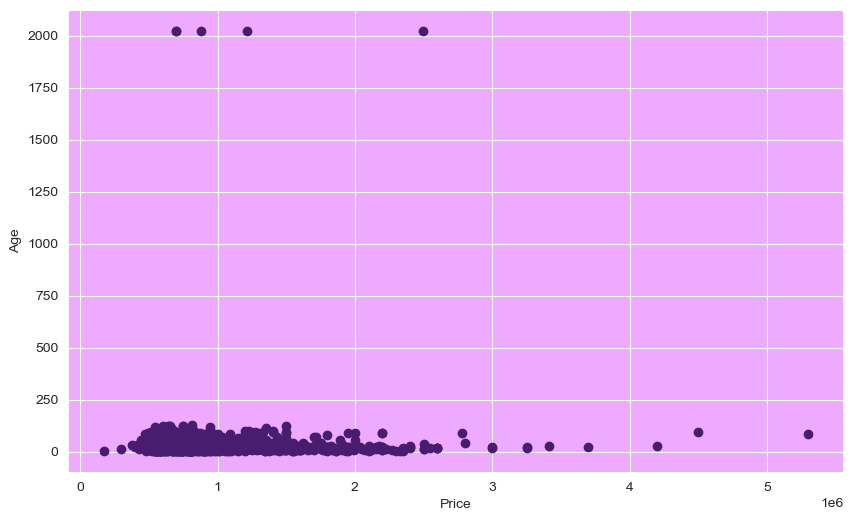

In [64]:
fig,ax=plt.subplots(figsize=(10,6));
ax.scatter(df["sold_price"],df["House_Age"]);
ax.set_ylabel("Age");
ax.set_xlabel("Price")
plt.show()
#scatter graph for sold_price and House_Age features

### Detecting Outliers and Dropping Them        <a class="anchor" id="outlier1"></a>

In [65]:
df.shape   #to see the number of rows and columns

(4940, 15)

In [66]:
Q1 = df.quantile(0.25)    #calculating Q1,Q3 and IQR.
Q3 = df.quantile(0.75) 
IQR = Q3 - Q1
print(IQR)

#The lower quartile, or first quartile (Q1), is the value under which 25% of data points are found 
#when they are arranged in increasing order. The upper quartile, or third quartile (Q3), 
#is the value under which 75% of data points are found when arranged in increasing order. 
#The IQR is the difference between Q3 and Q1.

sold_price    255000.00
zipcode           32.00
longitude          0.12
latitude           0.12
lot_acres          1.15
taxes           3286.40
bedrooms           1.00
bathrooms          1.00
sqrt_ft         1081.50
garage             1.00
fireplaces         2.00
HOA              126.00
House_Age         19.00
Kitchen_Sum        4.00
Floor_Sum          1.00
dtype: float64


In [67]:
df5= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]   
print(df5.shape)
#detecting outliers related to Q1,Q3 AND IQR rule and eliminating them.

(3136, 15)


In [68]:
df5.describe().loc["mean":,]    #calculating new statistical values that we need to check after deleting outliers

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,House_Age,Kitchen_Sum,Floor_Sum
mean,697788.57,85735.47,-110.91,32.34,1.05,6151.34,3.83,3.54,3456.90,2.74,1.75,75.57,27.10,6.47,2.14
std,147499.76,15.77,0.08,0.07,0.80,2211.52,0.72,0.73,657.60,0.56,1.00,69.70,12.74,2.94,0.71
min,375000.00,85701.00,-111.14,32.14,0.00,0.00,2.00,2.00,1690.00,1.00,0.00,0.00,4.00,1.00,1.00
25%,580000.00,85718.00,-110.96,32.30,0.54,4821.46,3.00,3.00,3006.50,2.00,1.00,12.00,19.00,5.00,2.00
50%,659623.50,85739.00,-110.91,32.32,0.87,6007.86,4.00,3.00,3401.00,3.00,2.00,55.00,24.00,5.00,2.00
75%,775000.00,85750.00,-110.86,32.39,1.18,7360.43,4.00,4.00,3832.00,3.00,2.00,125.00,35.00,8.00,3.00
max,1220000.00,85755.00,-110.70,32.55,3.45,12918.38,5.00,5.00,5738.00,4.50,5.00,323.00,64.00,15.00,4.00


In [69]:
df.describe().loc["mean":,]   #to see the statistical values again before deleting outliers

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,House_Age,Kitchen_Sum,Floor_Sum
mean,775748.54,85724.21,-110.91,32.32,4.24,9448.51,3.94,3.83,3715.98,2.82,1.88,82.78,30.72,6.49,2.17
std,316051.70,36.71,0.12,0.17,45.85,173984.78,1.16,1.32,1120.04,1.20,1.13,92.53,65.85,3.01,0.76
min,169000.00,85118.00,-112.52,31.36,0.00,0.00,1.00,1.00,1100.00,0.00,0.00,0.00,4.00,1.00,1.00
25%,585000.00,85718.00,-110.98,32.28,0.58,4819.76,3.00,3.00,3047.00,2.00,1.00,8.00,17.00,5.00,2.00
50%,679000.00,85737.00,-110.92,32.32,0.98,6250.80,4.00,4.00,3512.00,3.00,2.00,55.00,24.00,5.00,2.00
75%,840000.00,85750.00,-110.86,32.40,1.73,8106.15,4.00,4.00,4128.50,3.00,3.00,134.00,36.00,9.00,3.00
max,5300000.00,86323.00,-109.45,34.93,2154.00,12215075.00,36.00,36.00,22408.00,30.00,9.00,925.00,2023.00,15.00,6.00


The dataset initially consisted of 5000 rows and 16 columns. The "MLS" column had all unique values, so I set it as an index number. I calculated the age of the houses based on the year 2023 and removed the year_build column from the dataset. Kitchen_features column was including different properties. That’s why, they were separated and calculated the number of properties, because they might affect the house price. Also, to see relations between the features, data types were checked and were set as a numeric data type. With descriptive statistic values and graphs such as box and scatter, outliers were checked.  Also, missing values of all columns were filled with an appropriate values or dropped and outliers  were cleaned by using statistical methods such as IQR,Q1 and Q3. After data detecting and removing outliers, dataset consists of 3136 rows and 15 columns.